In [2]:
# level 3, Task 2 Random Forest Classifier on Churn Dataset
# Intern: Kingsley Onah


In [3]:
#  Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
train_df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [5]:
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

Training data shape: (2666, 20)
Testing data shape: (667, 20)


In [6]:
# Exploratory Data Analysis
print("\nFirst 5 rows of training data:\n", train_df.head())
print("\nMissing values in training data:\n", train_df.isnull().sum())
print("\nDuplicate rows in training data:", train_df.duplicated().sum())


First 5 rows of training data:
   State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99           

In [7]:
#  Encoding categorical variables

cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", cat_cols)



Categorical columns: ['State', 'International plan', 'Voice mail plan']


In [9]:
# Applying Label Encoding to categorical variables
le = LabelEncoder()
for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col]) 

In [11]:
# Separating features and target
target_col = 'Churn'  # replace with actual target column name if different
X_train = train_df.drop(target_col, axis=1)
y_train = train_df[target_col]
X_test = test_df.drop(target_col, axis=1)
y_test = test_df[target_col]

In [12]:
#  Initializing and training Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
#  Making a  predictions
y_pred = rf_clf.predict(X_test)


In [14]:
y_pred

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [16]:
#  Evaluating the  model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)


Accuracy: 0.9460
F1 Score: 0.9417

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.95      0.65      0.78        95

    accuracy                           0.95       667
   macro avg       0.95      0.82      0.87       667
weighted avg       0.95      0.95      0.94       667



In [17]:
# Feature Importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print("\nTop features by importance:\n", feat_importances.head(10))


Top features by importance:
 Total day minutes         0.132546
Total day charge          0.126868
Customer service calls    0.119861
International plan        0.088824
Total eve charge          0.064009
Total eve minutes         0.061374
Total intl calls          0.048108
Total intl charge         0.043624
Total intl minutes        0.042776
Total night charge        0.038501
dtype: float64


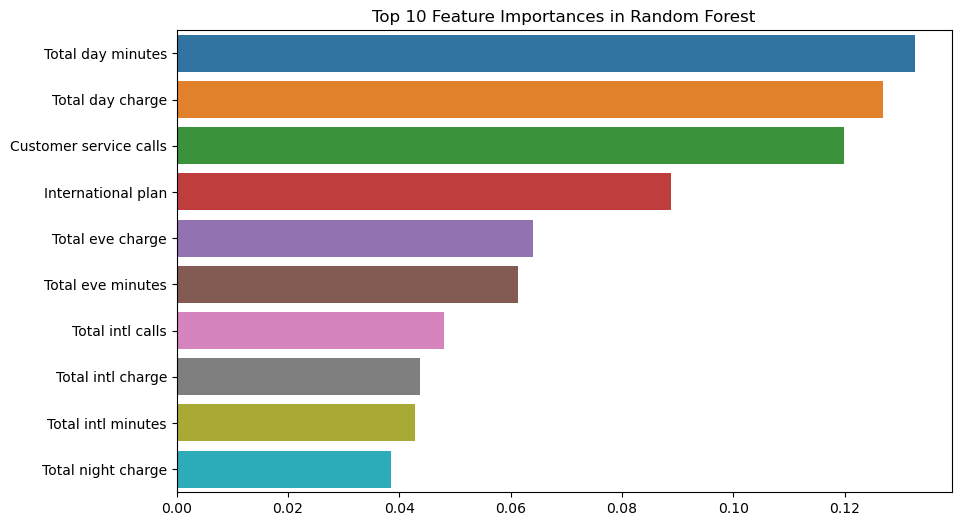

In [18]:
# Visualizing feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.head(10), y=feat_importances.head(10).index)
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()